![alt text](random_no_pic.jpg "Random")

# Numpy.random packagage
***
This notebook is part of the assessment of the course "Programming for Data Analysis". It explains the use of Numpy.random package and demostrates some features and distributions.
<br>
<br>

## What is numpy and numpy.random package?
**Numpy** is a python library that performs efficient calculations on multidimensional array and matrix data structures.
<br>
**numpy.random package** produces pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions [[1]](#References). <br>
<br>

## Simple Random Data 
https://numpy.org/doc/stable/reference/random/generator.html <br>
***

**Why do we need random data?** <br>
Random numbers are used for various purposes, from statistical analysis and probability theory, to cryptography and computer simulation. 
<br>
<br>
**How to generate random data?**<br>
Generating Psuedo-random number is easy, get a new instance of generator first, then simply call .random(). Note the default type is a float number.

In [46]:
# set up
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

#### Generate random floats
It returns random float number or array of random float number between 0(inclusive) and 1 (exclusive). 

In [47]:
# get a new instance of Generator
rng = np.random.default_rng()

# Generating a random float
a = rng.random() #size indicates number of random floats returned
print(a)

0.015848013742029043


<br>
Let's say I have a container of timber and want to know their length (in meter) when I randomly pick 10 of them. 

In [48]:
timber = rng.random(size=10)
print(timber)

[0.1878251  0.82658965 0.90612593 0.87442801 0.11593067 0.39487318
 0.7215648  0.27774715 0.15100165 0.48864455]


<br>
10 timbers is a relatively small sample to a container of it. Let's measure 10 groups of 10 samples.

In [49]:
# generate a 10-row x 10-element array of floats
group_timber=rng.random((10,10))
print(group_timber)

[[0.98576058 0.57860754 0.17865314 0.05114755 0.94265698 0.76550885
  0.16848645 0.23582032 0.90944304 0.00656619]
 [0.56732052 0.28867523 0.34232307 0.43094529 0.43913745 0.73128225
  0.57580743 0.36629886 0.11045022 0.57487166]
 [0.00864184 0.74327033 0.83657042 0.76691597 0.34046133 0.01517889
  0.8752652  0.60228951 0.34954378 0.77398453]
 [0.93812345 0.30771443 0.6504287  0.6216022  0.15422319 0.29732778
  0.82284814 0.49386608 0.29978025 0.712111  ]
 [0.94549092 0.68524092 0.29832457 0.25611301 0.88487168 0.00689985
  0.05328536 0.35345178 0.94867503 0.44794869]
 [0.47979744 0.47480479 0.19460494 0.12636572 0.35174088 0.69101913
  0.87153468 0.0421631  0.79210018 0.56594458]
 [0.29176919 0.3796312  0.03220778 0.68204306 0.71507446 0.19251288
  0.04863421 0.63681488 0.15892844 0.35141823]
 [0.23228343 0.25537435 0.0300653  0.15873225 0.65560919 0.0903467
  0.29449064 0.19153229 0.93211446 0.11029893]
 [0.66230109 0.77210138 0.62919181 0.09641598 0.20088172 0.49127527
  0.63315845 

In [50]:
# obviously, timber length can't be a negative floating point number, 
# but just to show numpy random is able to generate that.

# to generate a 2x2 array of negative float between -1 to 0 (exclusive)
1*rng.random((2,2))-1

array([[-0.93325177, -0.91411024],
       [-0.09499679, -0.70907782]])

<br>

#### Generate random integer
It allows user to specify lower and upper bound of the integer, and the shape of output returned. Upper bound is default to be exclusive, unless specify endpoint as True. Lower bound, upper bound and size can be an integer or an array.

Let's simulate rowing a die, and see what would be the outcome. The default is sampling from a discrete uniform distribution, which means each element in the range has equal probability to be picked. 

In [51]:
# row 1 die
die = rng.integers(1,7)

# or we can use the endpoint parameter
#die = rng.integers(1,6,endpoint=True)

print(die)

3


<br>
Let's see what the results would be if we row the die 10 times

In [52]:
# generate 10 random integers

rng.integers(low=1, high=6,size=10, endpoint=True)

array([4, 5, 3, 1, 1, 1, 6, 4, 4, 5], dtype=int64)

<br>
What about we repeat that 5 times?

In [53]:
# generate a 5-row x 10-element array of integers
rng.integers(low=1,high=6, size=[5,10], endpoint=True)

array([[5, 2, 2, 4, 4, 2, 5, 6, 3, 1],
       [3, 1, 6, 2, 4, 1, 4, 1, 6, 6],
       [3, 3, 5, 6, 3, 5, 2, 2, 1, 1],
       [4, 6, 5, 4, 2, 6, 3, 5, 3, 1],
       [6, 5, 3, 3, 1, 6, 3, 4, 2, 6]], dtype=int64)

<br>
Now a special die is introduced, in which faces are from 7 to 12. We throw both dice alternately 10 times, and see what the outcome would be. 

In [54]:
# generating a 10x2 array with lists of lower and upper bounds
# with first element in all rows between 1 to 6, 
#　second elements between 7 to 12 (inclusive)

rng.integers(low=[1,7],high=[6,12], size=(10,2), endpoint=True)

array([[ 3,  8],
       [ 3, 11],
       [ 5,  9],
       [ 4,  8],
       [ 3,  8],
       [ 6, 10],
       [ 1, 12],
       [ 3, 12],
       [ 5,  8],
       [ 2, 10]], dtype=int64)

<br>

#### Generate random sample from a given array
The function **.choice()** generates random sample from a given array. It takes 6 parameters. The parameters are the given array or int, size of output, with or without replacement, set probability of each array or int, axis to permute, and option to shuffle the sample when sampling without replacement. It follows an uniform distribution if probability is not specified.
<br>
<br>
Let's say we are simulating tossing a die 10 times and see the results

In [55]:
# .choice()
die = np.arange(1,7) #a die with 6 faces

# assume a fair die, with equal probability of each face
a = rng.choice(a=die, size=100)
print("a fair die") 
print(a)

a fair die
[4 3 6 4 6 3 3 4 4 2 3 1 3 5 4 2 1 6 2 1 1 5 3 6 4 4 4 5 6 5 2 4 6 4 6 3 5
 5 6 1 3 6 3 5 1 4 6 6 3 3 2 4 1 6 4 1 1 2 4 4 3 4 2 6 2 4 1 1 1 3 6 4 5 6
 1 3 1 2 2 1 3 6 5 2 2 5 3 6 4 1 6 6 3 4 1 6 4 5 6 5]


The above basically do the same as generating random integers, however .choice() can take in non-continuous range of number and take a random sample out of it as follows.

In [56]:
c = [2,5,8,12,17,23,27]
c_random = rng.choice(a=c, size=20)
print(c_random)

[17  5  8 17 12  8 23  8  5  2 12 12 12 23 12 23 17 12 12 27]


<br>
Now the die is no longer fair, but with a given list of probability.

In [57]:
# amended probability
prob=[0.38, 0.28, 0.18, 0.08, 0.05, 0.03]

b = rng.choice(a=die, p=prob, size=100)
print("an unfair die")
print(b) # we will see a lot of 1 and 2

an unfair die
[1 2 2 1 3 1 2 1 1 1 5 2 1 1 1 1 2 1 2 1 2 1 2 4 1 4 3 4 3 2 3 1 1 2 3 1 2
 3 6 3 3 1 2 5 1 3 3 3 1 1 2 1 2 1 1 2 2 2 1 1 3 1 1 2 1 2 1 1 3 2 1 2 5 2
 1 1 2 1 1 3 4 2 3 2 2 4 2 2 3 3 1 3 1 1 1 1 3 2 3 5]


The mean and median of fair die toss and unfair die toss would be quite different. While the mean and median of fair die toss would be around 3 to 4, the unfair one would be closer to 2 as the proabability was adjusted. 

In [58]:
print(f"Mean of 100 fair die toss is ", a.mean())
print(f"Median of 100 fair die toss is ", np.median(a))
print("")
print(f"Mean of 100 unfair die toss is ", b.mean())
print(f"Median of 100 unfair die toss is ", np.median(b))

Mean of 100 fair die toss is  3.62
Median of 100 fair die toss is  4.0

Mean of 100 unfair die toss is  2.05
Median of 100 unfair die toss is  2.0


<br>
Demostrates **replacement parameter** by simulating drawing card from a deck of 10 cards

In [59]:
# create a deck of 10 cards
card = np.arange(1,11) 

#draw 10 cards out of 10, without replacement
no_replace = rng.choice(a=card,size=10,replace=False)
print(f"The 10 cards drawn (without replacement) are:", no_replace)
print("")

#draw 10 cards out of 10, with replacement
replace = rng.choice(a=card,size=10,replace=True)
print(f"The 10 cards drawn (with replacement) are:", replace)
print("")

# draw 3 cards out of 10, repeat 10 times with replacement
draw10times= rng.choice(a=card,size=(10,3))
print(f"The results of 10 trials of drawing 3 cards from a deck of 10 are: \n", draw10times)

The 10 cards drawn (without replacement) are: [ 4  3  9  1 10  2  5  8  6  7]

The 10 cards drawn (with replacement) are: [6 9 2 3 6 9 8 7 3 6]

The results of 10 trials of drawing 3 cards from a deck of 10 are: 
 [[ 6  9  6]
 [ 3  6  7]
 [10  7  8]
 [ 8  6  6]
 [ 8  7  8]
 [ 1  4  1]
 [ 3 10  2]
 [ 6  8  9]
 [ 5  9  5]
 [10  2  5]]


<br>

**Generate random bytes**

In [60]:
 # return a string of random bytes with length of 7 
a = rng.bytes(7)
print (a, type(a)) # the bytes and is of type bytes


b'gt,\xd4\xb4Zm' <class 'bytes'>


<br>
<br>

## Permutation
https://numpy.org/doc/1.21/reference/random/generator.html?highlight=numpy%20generator#permutations
***
 <br>
There are 3 ways of randomly modifying or permuting a sequence or array, namely shuffle, permutation, permuted.

#### Shuffle
It takes 2 paramenters, the numpy array, and the axis to shuffle (default to 0 if not given). It shuffles the numpy array in place, meaning the numpy array itself is changed. If a 2D array is given, order of sub-arrays is changed, but contents in the sub-arrays remain the same, works on 1D and 2D arrays.

For example, there is a deck of 5 cards, numbered 1 to 5. I would like to shuffle them and see the sequence from top to bottom. 

In [61]:
# Shuffle, it returns a shuffled sequence of elements in the array
arr = np.array([1, 2, 3, 4, 5])

rng.shuffle(arr)
print(rng.shuffle(arr)) 
print(arr)


None
[5 3 2 1 4]


In [62]:
# shuffling 2d array
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])

rng.shuffle(arr2d)
print(rng.shuffle(arr2d)) 
print(arr2d)

None
[[6 7 8 9]
 [4 5 6 7]
 [1 2 3 4]]


The sequence of sub-arrays is changed, but the sequence of elements within the sub-arrays is not. 
<br>
<br>

In [63]:
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])

# what happen if axis is changed to 1
np.random.default_rng().shuffle(arr2d, axis=1) 

print(arr2d)

[[2 4 1 3]
 [5 7 4 6]
 [7 9 6 8]]


The elements in the sub-arrays are shuffled the same way, because they are on the same axis. The sequence of the sub-arrays is unchanged.

<br>

#### Permutation
It returns a copy with randomly shuffled elements or sub-arrays, meaning the numpy array itself is not changed. It takes 2 paramenters, the numpy array, and the axis to shuffle (default to 0 if not given). 

In [64]:
# Permutation
arr = np.array([1, 2, 3, 4, 5])
rng.permutation(arr)

print(rng.permutation(arr))
# a copy of permuted arr is returned

print(arr)
# arr remains unchanged, 
# the sequence of elements in the array is changed only when called

[2 1 4 3 5]
[1 2 3 4 5]


In [65]:
# It also supports 2D array
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])

# permutation of 2d array
rng.permutation(arr2d)
print(rng.permutation(arr2d))

[[4 5 6 7]
 [6 7 8 9]
 [1 2 3 4]]


The sequence of sub-arrays is changed, but the sequence of elements within the sub-arrays is not. 
<br>

In [66]:
# what happen if axis is changed to 1
print("Permutation array")
print(rng.permutation(arr2d, axis=1))

# Elements within the sub-arrays are shuffled the same way as they are on the same axis,
# the sequence of the sub-arrays remains unchanged
print("")

print("Original array unchanged")
print(arr2d)
# arr2d remains unchanged

Permutation array
[[4 2 3 1]
 [7 5 6 4]
 [9 7 8 6]]

Original array unchanged
[[1 2 3 4]
 [4 5 6 7]
 [6 7 8 9]]


<br>

#### Permuted
It takes 3 parameters, the numpy array, the axis to shuffle (default to 0 if not given), and "out" which specify the destination of the shuffled array. If out is given, shuffled array is returned there; if out is none, a shuffled copy is returned. <br>
It is a new method of permutation in NumPy version 1.21.0.

In [67]:
# Permutated
arr=np.array([1,2,3,4,5])

print("Permuted array: ")
print(rng.permuted(arr))
# a copy with the shuffled elements in the array is returned

print("Original array: ")
print(arr)
# arr remains unchanged

Permuted array: 
[4 1 2 3 5]
Original array: 
[1 2 3 4 5]


In [68]:
# It supports 2d array too
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])

print("Permuted array with axis = 1:")
print(rng.permuted(arr2d, axis=1))
# the sequence of sub-arrays remains unchanged, 
# but the elements within the arrays are randomly shuffled 
# each element is independent of elements on the same axis in other arrays, unlike .shuffle()

# if axis is set to 0 or not given
print("")
print("Permuted array with axis = 0:")
print(rng.permuted(arr2d))
# the 2d array is flattened, all elements are shuffled
# returns a 2d array in the same shape as arr2d

print("")
print("Original array: ")
print(arr2d) # arr2d is not changed


Permuted array with axis = 1:
[[3 1 4 2]
 [4 6 5 7]
 [8 9 7 6]]

Permuted array with axis = 0:
[[4 3 4 2]
 [5 8 7 9]
 [6 1 7 6]]

Original array: 
[[1 2 3 4]
 [4 5 6 7]
 [6 7 8 9]]


**out parameter in permuted function**

In [69]:
# out parameter
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])
#shuffled sub-arrays will go to arr2d
y = rng.permuted(arr2d, out = arr2d, axis=1) 

print(f"Array y:\n", y) 
print("")
print(f"Array arr2d:\n", arr2d) # arr2d is changed, as out is set to arr2d
# and now y is same as arr2d
print("")
print("Is the array y the same as arry2d:")
y == arr2d

Array y:
 [[4 3 2 1]
 [4 6 7 5]
 [9 8 7 6]]

Array arr2d:
 [[4 3 2 1]
 [4 6 7 5]
 [9 8 7 6]]

Is the array y the same as arry2d:


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

<br>
<br>

## 5 interesting distributions for sampling 
***

numpy.random package has also built-in a variety of distributions for random sampling for different use cases. The followings are explanation and visualization of some the the distributions. 

### Binomial Distribution
 <br>
The binomial distribution is frequently used to **model the number of successes in a sample of size n** drawn with replacement from a population of size N [[2]](#References).

The binomial distribution with parameters n and p represents the **discrete probability distribution** of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). For example the probability of getting a head, when tossing a coin 100 times. 

The main difference from a normal distribution is that **normal distribution is continous whereas binomial is discrete**. But if the trial number n is large  enough, binomial distribution will be quite similar to normal distribution with certain mean and median.<br>


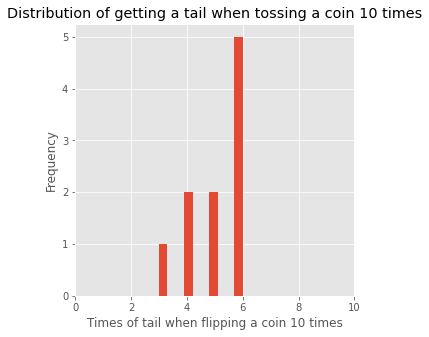

In [70]:
# Tossing a coin 10 times and eqaul probability of each side
rng = np.random.default_rng()
n, p = 10, .5 

# 10 trials of tossing a coin 10 times
trials = rng.binomial(n,p,10)

# plot a histogram
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(trials, bins=10)
plt.title("Distribution of getting a tail when tossing a coin 10 times")
plt.xlabel("Times of tail when flipping a coin 10 times")
plt.ylabel("Frequency")
plt.xlim(0,n)
plt.show()

<br>
How would the plot look like if we increase number of trials?

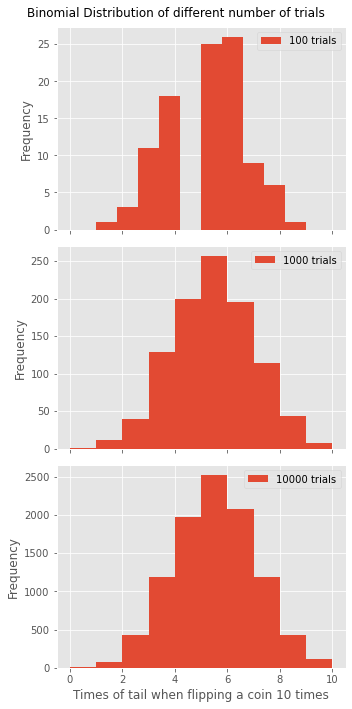

In [71]:
# binomial distribution of different sample sizes
# repeating the trials different number of times 

plt.rcParams["figure.figsize"] = (5,10)
plt.style.use("ggplot")
fig,axs = plt.subplots(3,1, sharex=True)

plt.suptitle("Binomial Distribution of different number of trials")
axs[0].hist(rng.binomial(n,p,100), label="100 trials")
axs[1].hist(rng.binomial(n,p,1000), label="1000 trials")
axs[2].hist(rng.binomial(n,p,10000), label="10000 trials")

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_ylabel("Frequency")
axs[1].set_ylabel("Frequency")
axs[2].set_ylabel("Frequency")
plt.xlabel("Times of tail when flipping a coin 10 times")
plt.tight_layout()
plt.show()

As sample size grows, it tends to look more like a normal distribution. 

<br>
<br>

### Normal Distribution
https://en.wikipedia.org/wiki/Normal_distribution <br>
Normal distribution is well-known of its bell-shaped curve. It can apply in many events, for example height of a given group, test scores, blood pressure etc. It takes 3 parameters namely means, standard deviation and size which would define the shape of the plots. <br>


For example, distribution of height of student in school A with mean=150cm, standarda deviation=5cm, sample size=500.

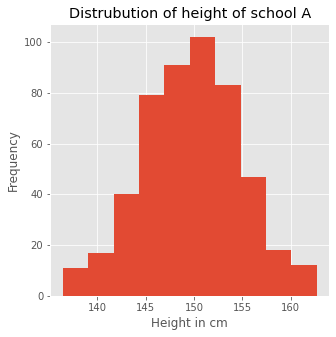

In [72]:
plt.rcParams["figure.figsize"] = (5,5)
norA= rng.normal(150, 5, 500)
plt.hist(norA,bins=10)
plt.ylabel("Frequency")
plt.xlabel("Height in cm")
plt.title("Distrubution of height of school A")

plt.show()

Here we have another distribution of height of School B with mean=160cm, standard deviation=10, sample size=500.

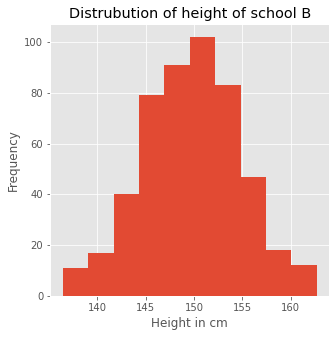

In [73]:
# normal distribution of school B
plt.rcParams["figure.figsize"] = (5,5)
norB=rng.normal(160, 10, 500)
plt.hist(norA,bins=10)
plt.ylabel("Frequency")
plt.xlabel("Height in cm")
plt.title("Distrubution of height of school B")

plt.show()

At a glance, the distribution of school A and school B look more or less the same. <br>
Let see them on a seaborn displot. <br>
The bell shape is shown by a distplot as well.

Text(0.5, 6.79999999999999, 'Height in cm')

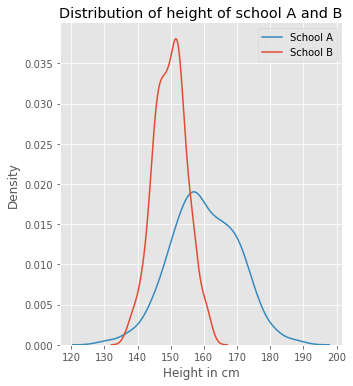

In [74]:
school_list= [norA, norB]

sns.displot(data=school_list, kind="kde", legend=False)
plt.title("Distribution of height of school A and B")
plt.legend(labels=["School A", "School B"])
plt.xlabel("Height in cm")


The distribution of School A with a smaller standard deviation has a taller bell shape and sharper peak, while school B with a taller mean height is shifted to the right and larger standard deviation makes it realatively flatter. 

<br>
<br>

### Poisson Distribution
Poisson Distribution is a Discrete Distribution. It estimates how many times an event can happen in a specified time. e.g. Estimating "how many customer would I get today, when the average rate is 10/day."

It has two parameters: lam is the known rate of occurences, and size. 

Text(0.5, 6.79999999999999, 'Number of customers')

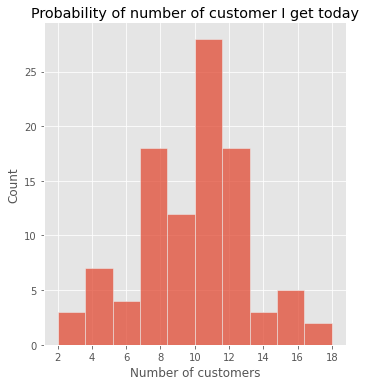

In [75]:
# average of 10 customers a day
px = rng.poisson(lam=10, size=100)
sns.displot(px, kind="hist",bins=10)
plt.title("Probability of number of customer I get today")
plt.xlabel("Number of customers")

<br>
If I have a different avearage number of customer, how would the plot look like?

In [76]:
# different avearge number of customer
poisson1 = rng.poisson(lam=2,size=1000)
poisson2 = rng.poisson(lam=5,size=1000)
poisson3 = rng.poisson(lam=7,size=1000)


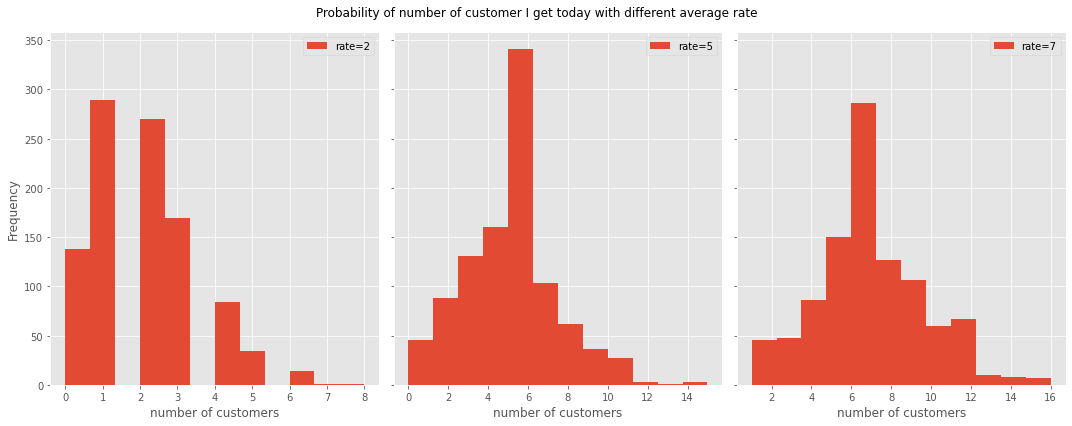

In [77]:
plt.rcParams["figure.figsize"] = (15,6)
plt.style.use("ggplot")
fig,axs = plt.subplots(1,3,sharey=True)
plt.suptitle("Probability of number of customer I get today with different average rate")
axs[0].hist(poisson1, bins=12, label="rate=2")
axs[1].hist(poisson2, bins=12, label="rate=5")
axs[2].hist(poisson3, bins=12, label="rate=7")

axs[0].set_xlabel("number of customers")
axs[1].set_xlabel("number of customers")
axs[2].set_xlabel("number of customers")
axs[0].set_ylabel("Frequency")
axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()
plt.show()

<br>

### Exponential Distribution
https://en.wikipedia.org/wiki/Exponential_distribution <br>

It models the time betwen events, for example, how long would it takes until next visitor browsing the website, for example when there is an average of 2 visitors to the website hourly. It is an inverse of Poisson which models how many events happens within a given time. <br> 
It takes 2 parameters, scale which is inverse of rate (lambda), defaults to 1.0; and size is shape of returned array.
E.G. given average visitor/hour =2; then scale will be 1/2 <br>


Let's take the above example to plot an exponential distribution showing the probability of how long it takes for the next visitor to the website when repeating 1000 times.<br>
x-axis is the amount of time between events, y-axis is scaled so that the total area under the curve equals 1.<br>

In [78]:
# we have an average visitor of 2/hour, that turns the scale to 1/2, 
# and trials of 1000 times
expon = rng.exponential (scale=1/2, size=1000)

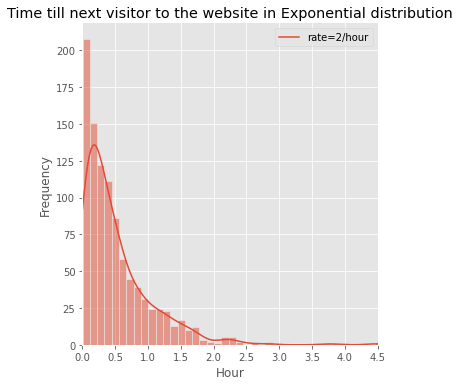

In [79]:
#plt.hist(expon)
sns.displot(expon, kde=True, legend=False)
plt.title("Time till next visitor to the website in Exponential distribution")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.xlim(0,4.5)
plt.legend(labels=["rate=2/hour"])

From the above plot, there is around 80 trials out of 1000 that the next visitor visits the website in half an hour, given the average rate of 2 visitor per hour. 

What about the distribution of different average rate, how do they look like?
Let's try average rates of 2, 5, 10 per hour. 

In [80]:
expon1 = rng.exponential (scale=1/2, size=100)
expon2 = rng.exponential (scale=1/5, size=100)
expon3 = rng.exponential (scale=1/10, size=100)

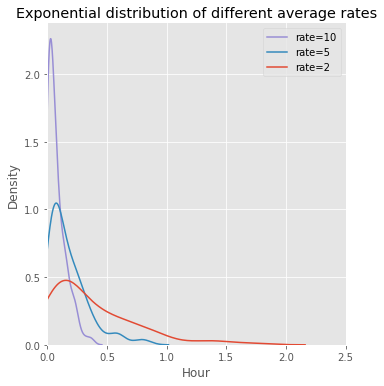

In [81]:
#plot
expon_list = [expon1, expon2, expon3]
sns.displot(expon_list, kind="kde",legend=False)
plt.title("Exponential distribution of different average rates")
plt.xlim(0, 2.5)
plt.xlabel("Hour")
plt.legend(labels=["rate=10","rate=5", "rate=2"])
plt.show()

The plot shows that when the avearge rate is 10, it is very likely that the next visitor will visit the website in less than 20 minues. When the rate is 5, it is likely the next visitor will visit the website within 1 hour. When the rate is 2, it is likely the next visitor will visit the website within 2 hours. 

<br>

### Uniform Distribution
(https://en.wikipedia.org/wiki/Discrete_uniform_distribution) <br>
Uniform distribution essentially means there are a known, finite number of outcomes, each has equal probability to happen. An example is throwing a fair dice, with 6 known, finite outcomes 1,2,3,4,5,6. Each time the die is thrown, the probability of a given outcome is 1/6.<br>
It has 3 parameters, low = lower bound, high = upper bound, size=shape of returned array.

In [82]:
# generate an array of 1000 samples between 1 to 6
# based on uniform distribution

s = rng.uniform(1,6,1000)
#print (s)

Tossing a fair die 10 times, and see the distribution of outcome.

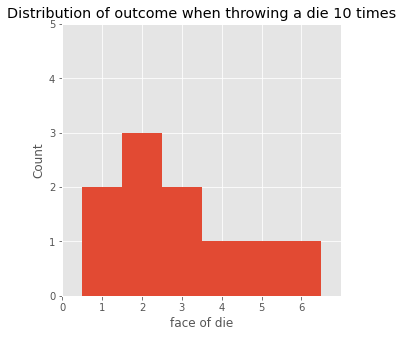

In [83]:
# as random integers generate whole number based on uniform distribution, 
# so I will use this instead of .uniform() which generate floating point number
die10=rng.integers(1,7,10)

plt.rcParams["figure.figsize"] = (5,5)
bins=np.arange(8)-0.5 #try to position xtick in the middle of the bars
plt.hist(die10, bins=bins)
plt.title("Distribution of outcome when throwing a die 10 times")
plt.ylim([0,5])
plt.xticks(np.arange(0, 7, step=1.0))
plt.xlim([0, 7])
plt.xlabel("face of die")
plt.ylabel("Count")
plt.show()

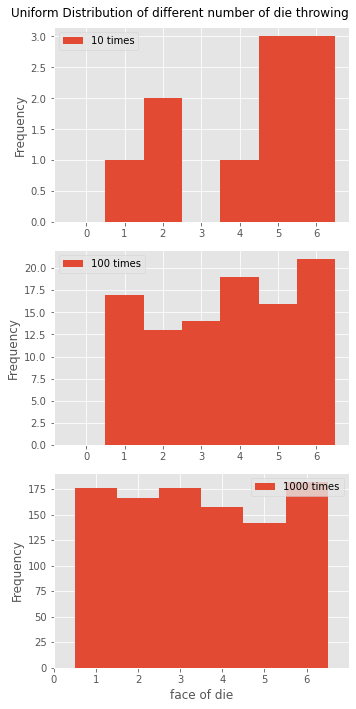

In [84]:
# multiple subplots of different sample size

plt.rcParams["figure.figsize"] = (5,10)
fig, axs = plt.subplots(3,1)
plt.suptitle("Uniform Distribution of different number of die throwing")
bins=np.arange(8)-0.5

axs[0].hist(rng.integers(1,7,10), bins, label="10 times")
axs[1].hist(rng.integers(1,7,100),bins, label="100 times")
axs[2].hist(rng.integers(1,7,1000),bins, label="1000 times")
plt.xticks(np.arange(0, 7, step=1.0))
plt.xlim([0, 7])
axs[0].set_ylabel("Frequency")
axs[1].set_ylabel("Frequency")
axs[2].set_ylabel("Frequency")
plt.xlabel("face of die")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.tight_layout()
plt.show()

As the sample size grows, the distribution becomes more uniform.

<br>
<br>

### Chi-square Distribution

It is essentially the distribution of a sum of squared random variables from standard normal distribtuion. Number of samples being squared and summed is the degrees of freedom which is also . It is used to test goodness of fit as well. 

The chi-square distribution is widely used in **hypothesis testing** and contructing confidence interval[[3]](#References). Chi-square test is used for determining if 2 categorical variables (gender, age range, preference of ice-cream flavours etc.) are **significantly correlated** or determining **goodness of fit** by comparing expected frequenycy to actual frequency at a certain level of confidence (usually 95%). <br>

It takes 2 parameters, degree of freedom (df), and size as shape of output.


In [85]:
#generate an output array of 2-row with 4-element each
x = rng.chisquare(df=2, size=[2,4]) 
print(x)

[[0.17033286 0.18723267 0.08501611 5.60355698]
 [1.20535755 3.72373201 0.25134159 1.55789931]]


<br>
<br>
For example, I have some batteries which are normally distribtued in terms of how long they last. If I randomly pick 3 samples from them, and repeat 100 times. The plot shows the distribution of 3 random samples squared and then summed, repeated 100 times. 


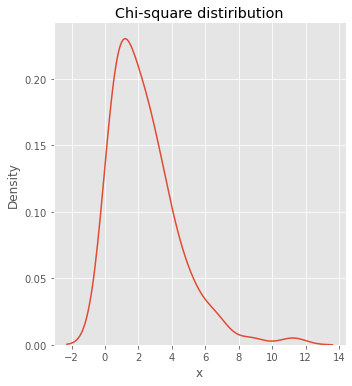

In [86]:
x2=rng.chisquare(df=3,size=100)
sns.displot(x2, kind="kde")
plt.title("Chi-square distiribution")
plt.xlabel("x")
plt.show()

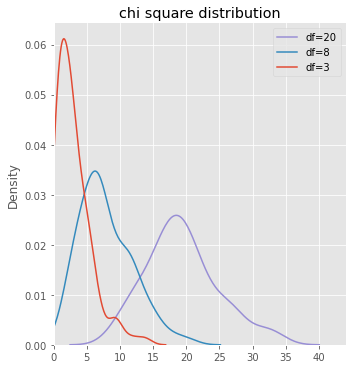

In [87]:
# If I pick different number of samples, the distribution curve would change. 
x1 = rng.chisquare(df=3,size=100) #3 samples
x2 = rng.chisquare(df=8,size=100) #8 samples
x3 = rng.chisquare(df=20,size=100) #20 samples
x_list= [x1,x2,x3]

sns.displot(x_list, kind="kde", legend=False)
plt.title("chi square distribution")
plt.xlim(0,44)
plt.legend(labels=["df=20","df=8", "df=3"])

The curve is flattening as df increases, and looking more like a normal distribution. 

<br>
<br>

## What is Seeding
Seeding is to make sure same sets of psuedo random number is generated for easier replication of output. If you provide the same seed, you will get the same output. And if you change the seed, you will get a different output. The output generated depends on the input given.<br/>
It is not absolutely necessary to seed, but it should be used if you want your code to produce repeatable outputs.<br>


**How to Seed?**

In [88]:
seed = 2
seed2 = 10

rng=np.random.default_rng(seed=seed)
# generate 10 random float numbers between 0 and 1
print(rng.random(size = 10))

rng2 = np.random.default_rng(seed=seed2)
print(rng2.random(size=10))

# different seeds different output

[0.26161213 0.29849114 0.81422574 0.09191594 0.60010053 0.72856053
 0.18790107 0.05514663 0.27496937 0.65743301]
[0.95600171 0.20768181 0.82844489 0.14928212 0.51280462 0.1359196
 0.68903648 0.84174772 0.425509   0.956926  ]


In [89]:
rng=np.random.default_rng(seed=seed)
print(rng.random(size = 10))
# same seed same output 

[0.26161213 0.29849114 0.81422574 0.09191594 0.60010053 0.72856053
 0.18790107 0.05514663 0.27496937 0.65743301]


<br>

**Without seed** <br>
Different output is generated every time.

In [90]:
rng=np.random.default_rng()
print("Without seed, different output:")
print(rng.random(size=10))
print(rng.random(size=10))
print(rng.random(size=10))
print("------------------------------")
print("")
# use the seed we used before and still same outcome
print("using the same seed used above:")
rng=np.random.default_rng(seed=seed)
print(rng.random(size = 5))

Without seed, different output:
[0.11758462 0.46803785 0.13190099 0.97505651 0.90578045 0.29784792
 0.70342046 0.54247073 0.69000496 0.34111975]
[3.66342037e-04 8.07361966e-01 5.25112136e-01 7.44202169e-01
 9.20261546e-03 4.75172096e-01 4.30338699e-01 7.52350481e-01
 2.33748505e-01 5.24452217e-01]
[0.36716218 0.84846673 0.98748136 0.04967318 0.7901895  0.0666287
 0.49059776 0.3976885  0.32221292 0.16925042]
------------------------------

using the same seed used above:
[0.26161213 0.29849114 0.81422574 0.09191594 0.60010053]


<br>

#### PCG64 vs MT19937

numpy.random recently changed the Psuedo Random Number Generator from **Mersenne Twister**[[4]](#References) to **Permuted Congruential Generator(PCG64)**[[5]](#References). Based on pcg-random.org[[6]](#References), PCG is faster, more compact which means using less memory, harder to predict, support multiple streams (analogy of 1 code book vs multiple code books), smaller code size and complexity. <br>


<br>
<br>

## References
***

[1]: <a href="https://numpy.org/doc/stable/reference/random/index.html?highlight=numpy%20random#module-numpy.random">Numpy random package</a> 

[2]: <a href="https://en.wikipedia.org/wiki/Binomial_distribution">Binomial distribution</a>

[3]: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution#Introduction"> Chi-squared distribution</a>

[4]: <a href="https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html#numpy.random.MT19937">Mersenne Twister</a>

[5]: <a href="https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64">PCG64</a>

[6]: <a href="https://www.pcg-random.org">pcg-random.org</a>

***
# END